# Genre Prediction - Exploratory Data Analysis<a id='EDA'></a>

## Contents<a id='Contents'></a>
* [Exploratory Data Analysis](#EDA)
  * [Contents](#Contents)
    * [Imports](#Imports)
    * [Load Data](#LoadData)
  * [Distributions of Dataset Features](#Distributions)
    * [Release Year](#ReleaseYear)
    * [Song Duration](#SongDuration)
    * [Mode](#Mode)
    * [Audio Features](#AudioFeatures)
  * [Relationships between Dataset Features](#Relationships)
    * [Pairplot](#Pairplot)
    * [Heatmap](#Heatmap)
  * [Dataset Features by Genre](#FeaturesByGenre)
    * [Averages of Dataset Features by Genre](#AveragesByGenre)
      * [Popularity](#PopularityAverages)
      * [Song Duration](#DurationAverages)
      * [Tempo](#TempoAverages)
      * [Mode](#ModeAverages)
      * [Audio Features](#FeatureAverages)
    * [Distributions of Dataset Features by Genre](#DistributionsByGenre)
      * [Pop](#Pop)
      * [R&B](#R&B)
      * [Hip Hop](#HipHop)
      * [Latin](#Latin)
      * [Reggae](#Reggae)
      * [EDM](#EDM)
      * [Indie](#Indie)
      * [Rock](#Pop)
      * [Metal](#Metal)
      * [Country](#Country)
      * [Jazz](#Jazz)
      * [Classical](#Classical)
  * [Hypothesis Testing](#HypothesisTesting)
    * [One-Factor ANOVA of Genre Valence](#ValenceANOVA)
    * [One-Factor ANOVA of Genre Speechiness](#SpeechinessANOVA)
    * [One-Factor ANOVA of Genre Acousticness](#AcousticnessANOVA)
    * [Two-Factor ANOVA of Genre Danceability and Energy](#DanceabilityEnergyANOVA)
    * [Rock vs Country](#RockCountry)
    * [Rock vs Metal](#RockMetal)
    * [Rap vs R&B](#RapR&B)
    * [Pop vs Rock](#PopRock)
    * [Pop vs Rap](#PopRap)
    * [Pop vs Latin](#PopLatin)
    * [Pop vs Indie](#PopIndie)
    * [Pop vs Country](#PopCountry)
  * [Conclusion](#Conclusion)

### Imports<a id='Imports'></a>

In [1]:
import os
import math
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import product
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.multivariate.manova import MANOVA

### Load Data<a id='Load Data'></a>

In [2]:
df = pd.read_csv('audio_features.csv')
df.head()

track_id                                    track  \
0  27ycaQnQAxaPiyeg3nr2aB                             Midnight Sky   
1  0prNGof3XqfTvNDxHonvdK                  Scars To Your Beautiful   
2  7JDWhC422Gtk1Bq0mL3OTC                           feel something   
3  1rfofaqEpACxVEHIZBJe6W                Havana (feat. Young Thug)   
4  3e7sxremeOE3wTySiOhGiP  Dusk Till Dawn (feat. Sia) - Radio Edit   

           artist                 album release_date subgenre genre  \
0     Miley Cyrus          Midnight Sky   2020-01-01      pop   pop   
1    Alessia Cara  Know-It-All (Deluxe)   2015-01-01      pop   pop   
2      Bea Miller        feel something   2019-01-01      pop   pop   
3  Camila Cabello                Camila   2018-01-01      pop   pop   
4            ZAYN          Icarus Falls   2017-01-01      pop   pop   

   duration_ms  popularity  danceability  ...  speechiness  acousticness  \
0       223279          92         0.705  ...     0.032309       0.00115   
1       230226          73         0.573  ...     0.282309       0.02850   
2       180161          86         0.740  ...     0.127913       0.24200   
3       217306          82         0.765  ...     0.020127       0.18400   
4       239000          64         0.259  ...     0.042903       0.10200   

   instrumentalness  liveness  valence    tempo   mode  release_year  \
0          0.003120     0.203   0.2590  110.000  minor          2020   
1          0.000000     0.111   0.4510   97.085  major          2015   
2          0.000156     0.319   0.1560  136.029  major          2019   
3          0.000036     0.132   0.3940  104.988  major          2018   
4          0.000001     0.106   0.0951  180.042  minor          2017   

  duration_min  duration_minsec  
0     3.721317        3 m, 43 s  
1     3.837100        3 m, 50 s  
2     3.002683         3 m, 0 s  
3     3.621767        3 m, 37 s  
4     3.983333        3 m, 59 s  

[5 rows x 22 columns]

## Distributions of Dataset Features<a id='Distributions'></a>

**Release Years**<a id='Release Years'></a>

The distribution of Release Years is highly skewed left, with just over 10% of songs (887/8400) coming from this year (2020) alone. This is somewhat expected due to the fact that the playlists from which these songs were collected from are constantly updated. However, this may also suggest that the subgenres chosen to represent each major genre are relatively young and may not accurately represent the full scope of a genre over its lifespan.

Summary Statistics:
 count    8400.000000
mean     2003.868333
std        15.837580
min      1899.000000
25%      1996.000000
50%      2008.000000
75%      2017.000000
max      2020.000000
Name: release_year, dtype: float64

Shapiro-Wilk Test for Normality:  0.8733389973640442

Count per Year:
 2020    887
2019    652
2018    425
2017    323
2014    268
2016    263
2011    238
2005    232
2015    228
2007    227
2006    221
2010    211
2013    205
2009    197
2012    196
2004    195
2008    195
1999    176
2003    156
2002    149
Name: release_year, dtype: int64


C:\Users\colel\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


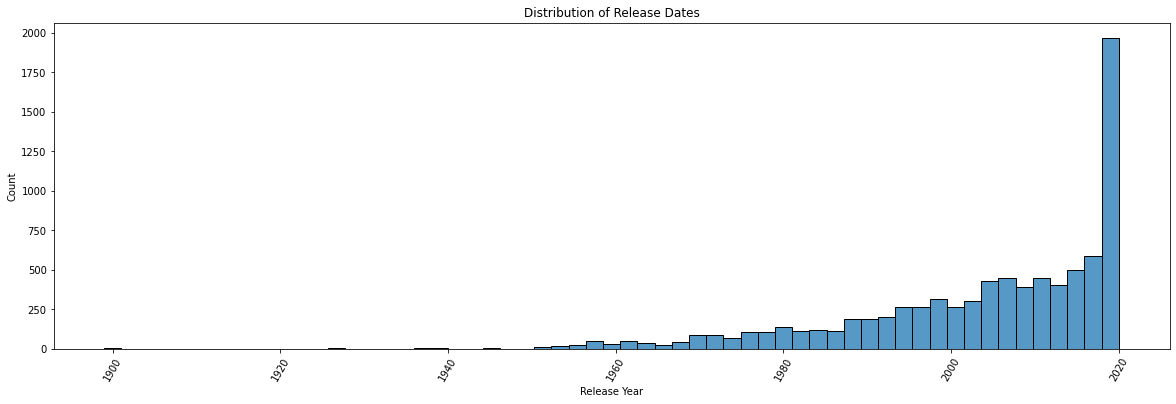

In [3]:
print('Summary Statistics:\n', df.release_year.describe())
print('\nShapiro-Wilk Test for Normality: ', stats.shapiro(df.release_year)[0])
print('\nCount per Year:\n', df.release_year.value_counts().head(20))

plt.figure(figsize=(20, 6))
plt.title('Distribution of Release Dates')
plt.xlabel('Release Year')
plt.xticks(rotation=60)
sns.histplot(df.release_year)
plt.show()

**Song Duration**<a id='Song Duration'></a>

The distribution of Track Lengths is skewed right, as one might expect due to vast amount of large outliers (long songs), although the distribution still resembles a bell-curve. A Shapiro-Wilk Test for Normality confirms that the distribution is not Gaussian.

Summary Statistics:
 count    8400.000000
mean        4.147765
std         1.473964
min         2.002217
25%         3.271996
50%         3.802700
75%         4.544862
max        19.149100
Name: duration_min, dtype: float64

Shapiro-Wilk Test for Normality:  0.7736432552337646


C:\Users\colel\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


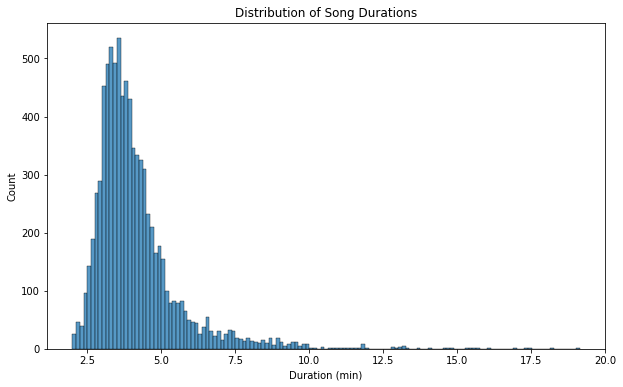

In [4]:
print('Summary Statistics:\n', df.duration_min.describe())
print('\nShapiro-Wilk Test for Normality: ', stats.shapiro(df.duration_min)[0])

plt.figure(figsize=(10,6))
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (min)')
sns.histplot(df.duration_min)
plt.show()

**Mode**<a id='Mode'></a>

About 63.7% (5350/8400) songs have a major key progression while the remaining 36.3% of songs are minor.

Count by Key Type:
 major    5350
minor    3050
Name: mode, dtype: int64


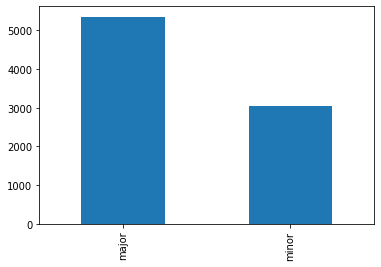

In [5]:
print('Count by Key Type:\n', df['mode'].value_counts())

df['mode'].value_counts().plot(kind='bar')
plt.show()

**Audio Features**<a id='Audio Features'></a>

The data definition, summary statistics, and distributions of each audio feature are displayed below.

danceability :  How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

energy :  A perceptual measure of intensity and activity on a scale of 0.0 to 1.0 . Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

loudness :  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

speechiness :  Detects the presence of spoken words in a track. The more

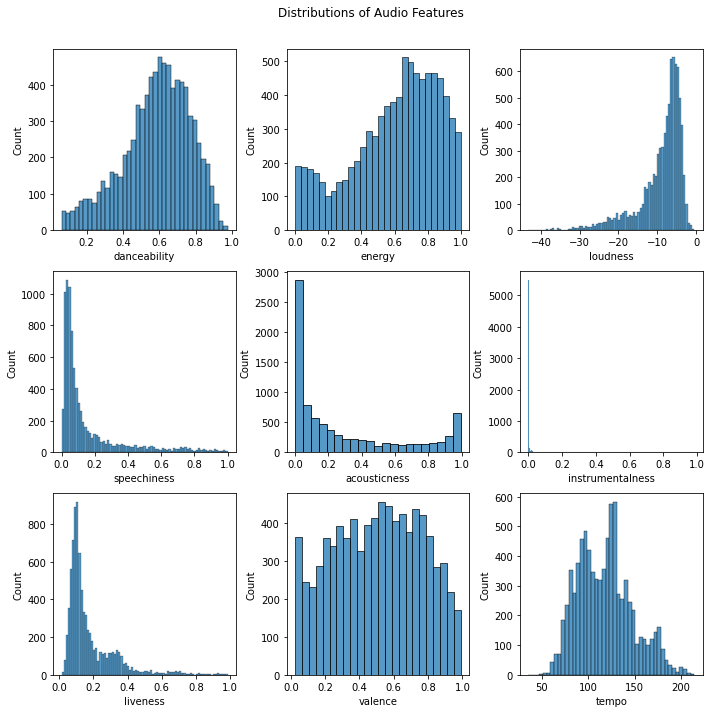

In [6]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']
data_def = pd.read_csv('data_definitions.csv', index_col=0)
for ind in audio_features:
    print(ind, ': ', data_def.loc[ind]['definition'], '\n')
af = df[audio_features]
print('Summary Statistics:\n', af.describe())

fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.suptitle('Distributions of Audio Features')
fig.tight_layout(pad=2.0)
for i, column in enumerate(df.columns[9:18]):
    sns.histplot(df[column],ax=axes[i//3,i%3])
plt.show()

## Relationships between Dataset Features<a id='Relationships'></a>

#### Pairplot<a id='Pairplot'></a>

The relationships between each of the above features is displayed below.

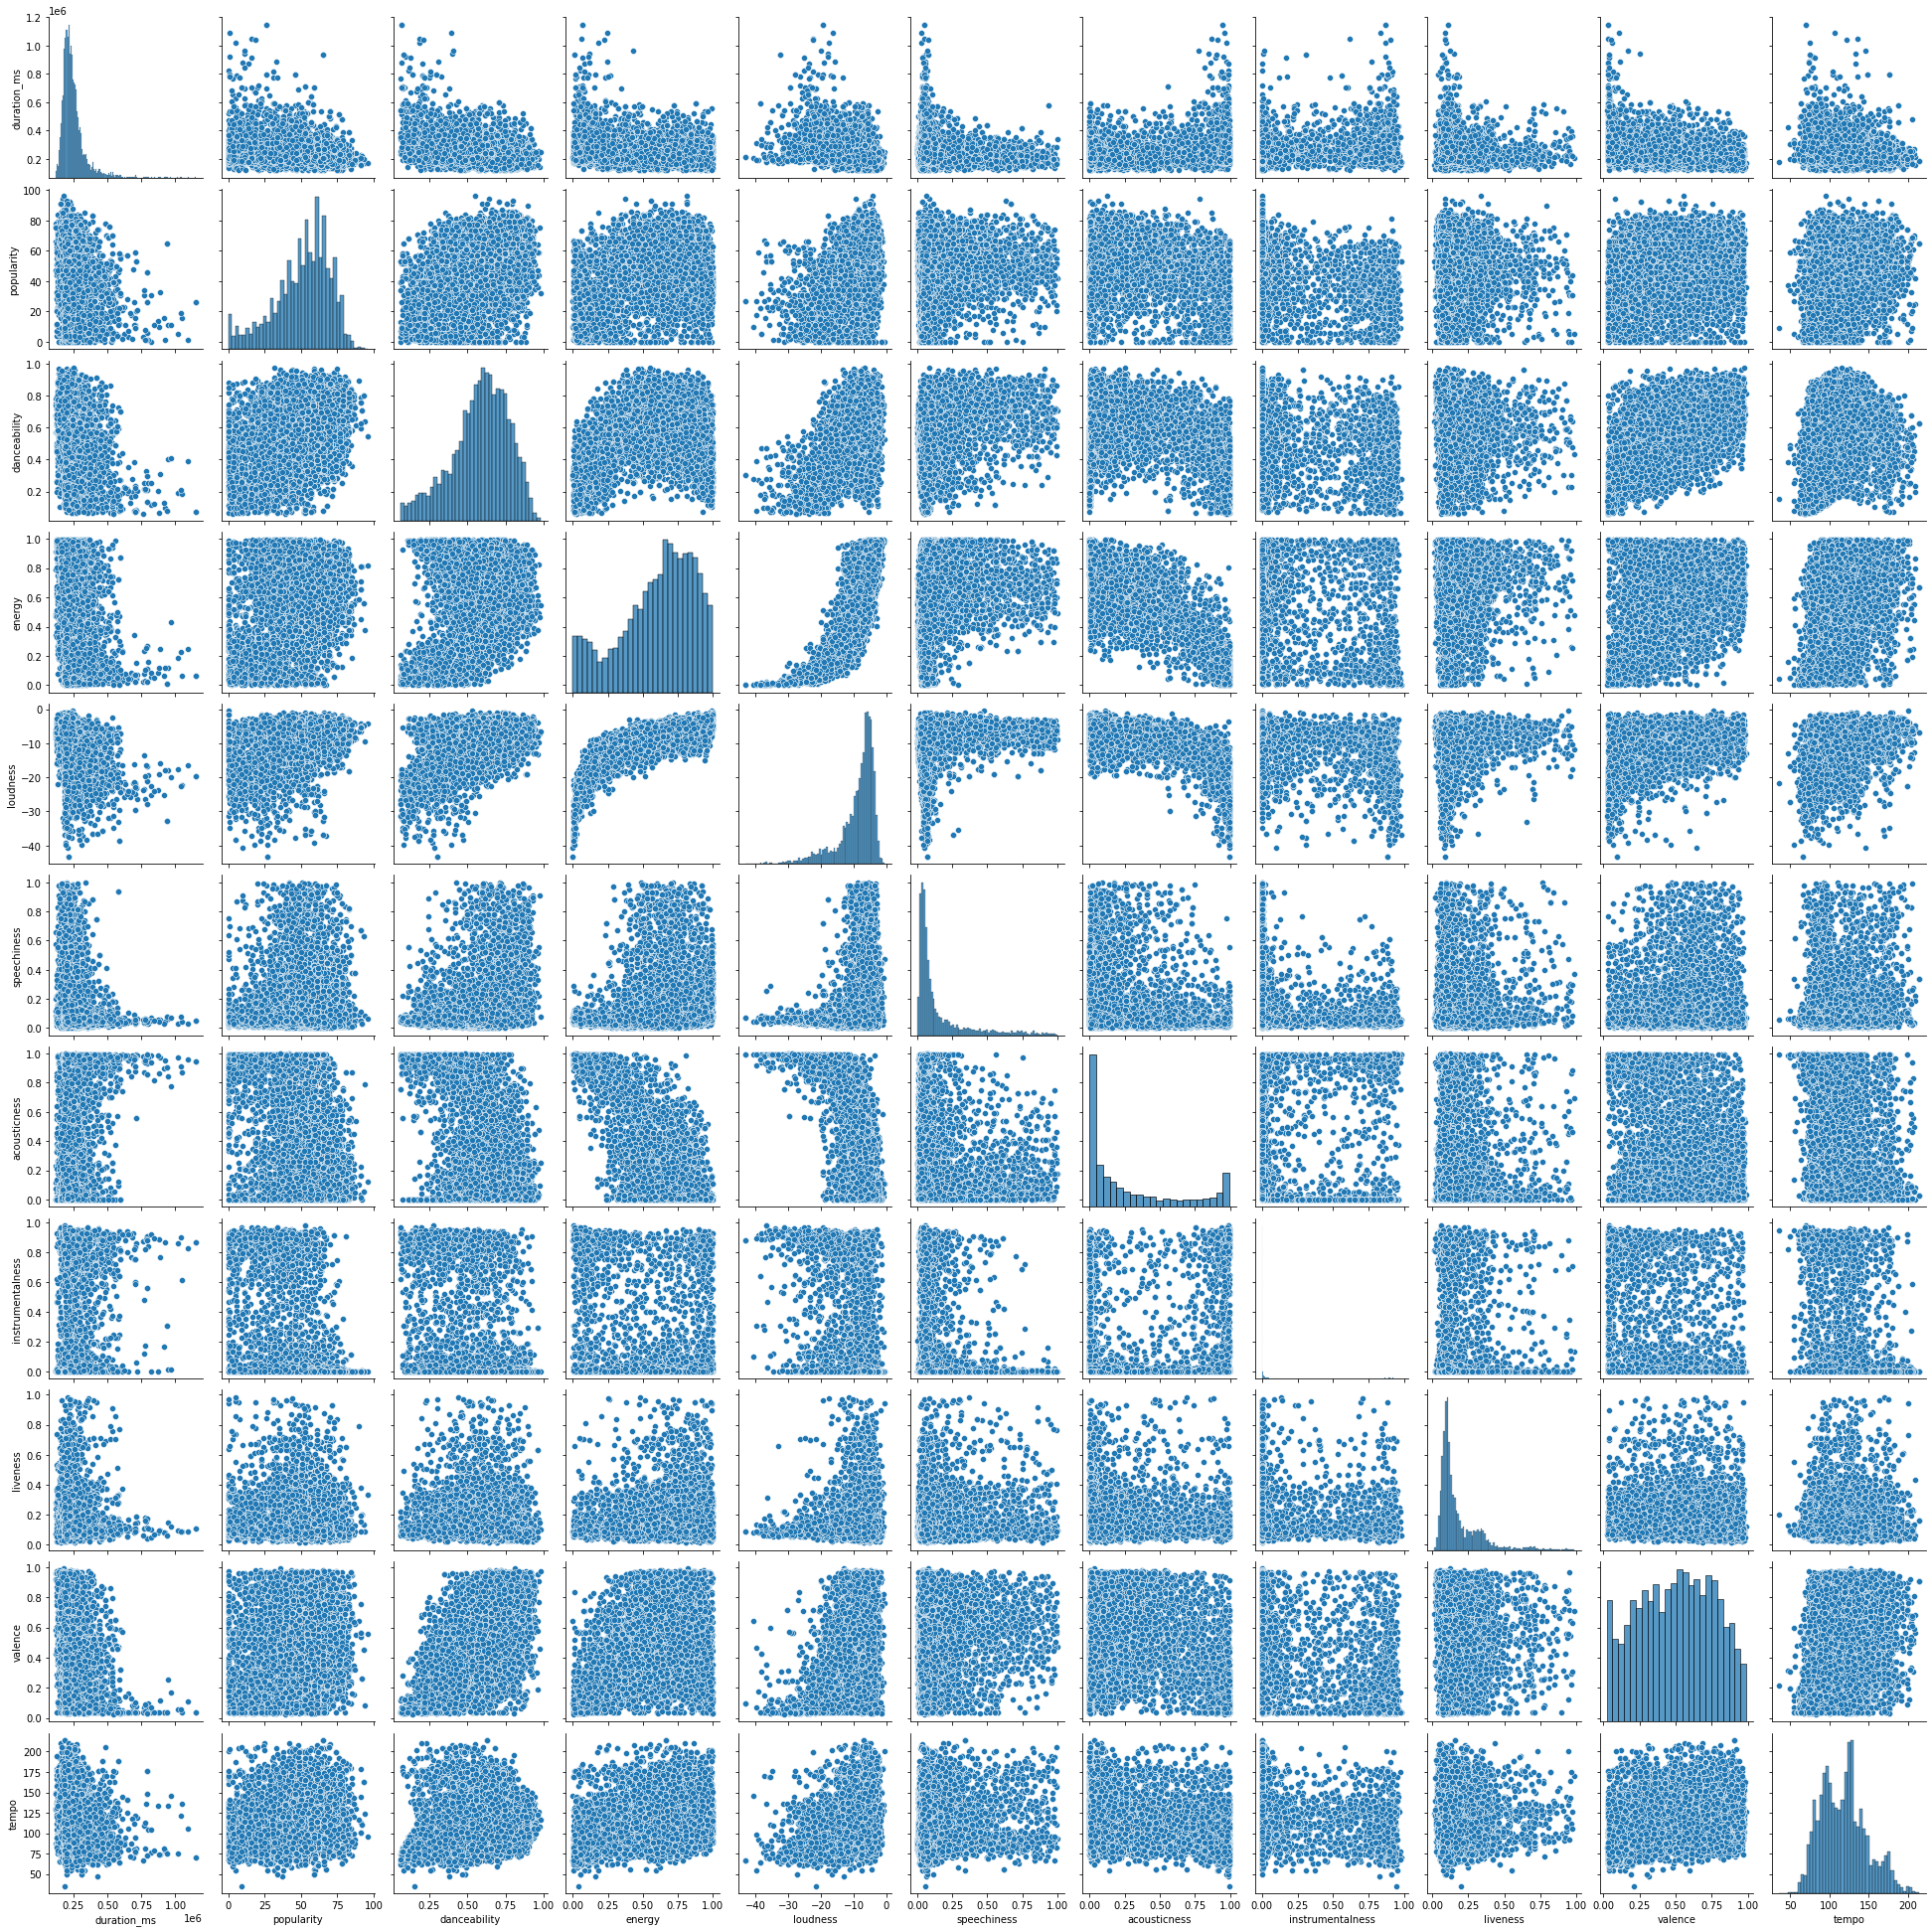

In [7]:
sns.pairplot(df.iloc[:,7:18])

#### Heatmap<a id='Heatmap'></a>

The correlations between each of the above features is displayed below.

<AxesSubplot:>

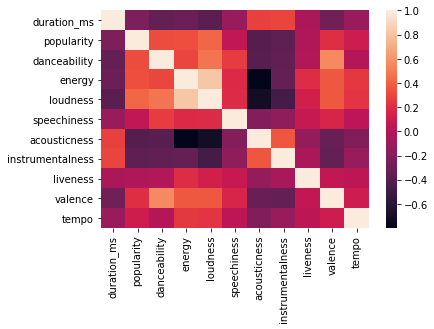

In [8]:
sns.heatmap(df.iloc[:,7:18].corr())

#### Energy vs Loudness

This is the strongest relationship between any of the above features. It makes intuitive sense that subjectively more energetic songs would tend to be louder on average. 

Pearson Correlation:  0.8231190429209747


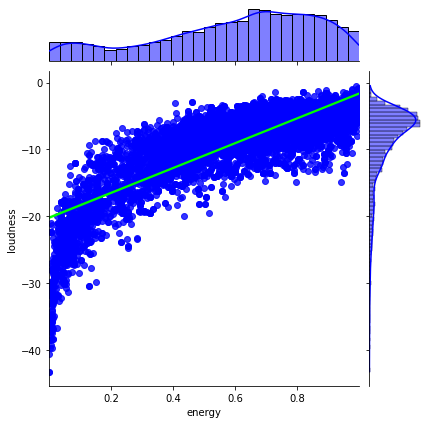

In [9]:
print('Pearson Correlation: ', stats.pearsonr(df.energy, df.loudness)[0])
#sns.scatterplot(x=df.energy, y=df.loudness, ax=ax[0])
sns.jointplot(x='energy', y='loudness', data=df, kind='reg',
             color='blue', joint_kws={'line_kws':{'color':'lime'}})

#### Acousticness vs Energy

The extent to which a track was acoustic and its level of energy were negatively correlated, insinuating that acoustic music tends to be less energetic subjectively.

Pearson Correlation:  -0.798390928255769


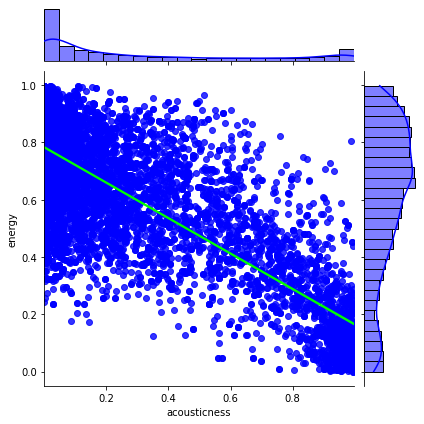

In [10]:
print('Pearson Correlation: ', stats.pearsonr(df.acousticness, df.energy)[0])
sns.jointplot(x='acousticness', y='energy', data=df, kind='reg',
             color='blue', joint_kws={'line_kws':{'color':'lime'}})

#### Acousticness vs Loudness

Acousticness and Loudness are also negatively correlated, although their relationship is not as linear as that of Acousticness and Energy, likely do the the skewed nature of each distribution.

Pearson Correlation:  -0.7112452782481313


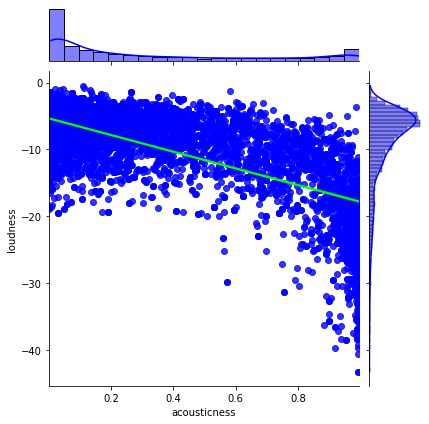

In [11]:
print('Pearson Correlation: ', stats.pearsonr(df.acousticness, df.loudness)[0])
sns.jointplot(x='acousticness', y='loudness', data=df, kind='reg',
             color='blue', joint_kws={'line_kws':{'color':'lime'}})

#### Tempo vs Energy

The tempo of a song and its level of energy have a moderate positive correlation, aligning with the natural assumption that faster songs are likely to be high in energy.

Pearson Correlation:  0.2534451834250403


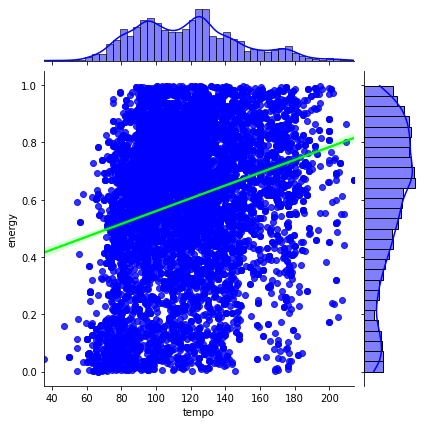

In [12]:
print('Pearson Correlation: ', stats.pearsonr(df.tempo, df.energy)[0])
sns.jointplot(x='tempo', y='energy', data=df, kind='reg',
             color='blue', joint_kws={'line_kws':{'color':'lime'}})

#### Tempo vs Loudness

Tempo and Loudness are also positively correlated, although once again their relationship is not nearly as linear as that of Tempo and Energy.

Pearson Correlation:  0.23634448508648412


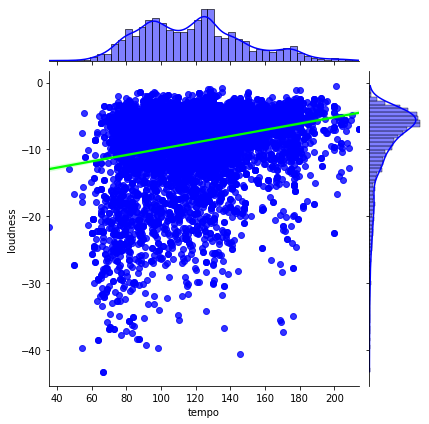

In [13]:
print('Pearson Correlation: ', stats.pearsonr(df.tempo, df.loudness)[0])
sns.jointplot(x='tempo', y='loudness', data=df, kind='reg',
             color='blue', joint_kws={'line_kws':{'color':'lime'}})

## Dataset Features by Genre<a id='FeaturesByGenre'></a>

In [14]:
genre_colors = pd.Series(['red', 'orange', 'gold', 'green', 'lightblue', 'blue',
                          'violet', 'purple', 'brown', 'tan', 'olive', 'silver'],
                        index=['pop', 'r&b', 'rap', 'latin', 'edm', 'reggae',
                               'indie','rock','metal', 'country', 'jazz', 'classical'])

### Averages of Dataset Features by Genre<a id='AveragesByGenre'></a>

#### Popularity<a id='PopularityAverages'></a>

The most popular genres are Rock, Rap, and Pop, in that order. Classical and Jazz are significantly less popular, perhaps due to the fact that they are relatively outdated comparatively to the modern major genres.

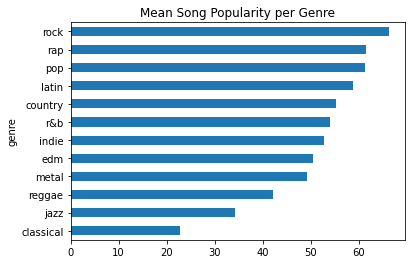

In [15]:
df.groupby('genre').popularity.mean().sort_values().plot(kind='barh')
plt.title('Mean Song Popularity per Genre')
plt.show()

#### Song Duration<a id='DurationAverages'></a>

The genres with the lowest mean song duration were Country, Pop, and EDM, in that order. Classical and Jazz songs are significantly longer on average than those of other major genres, once again most likely due to their outdated nature.

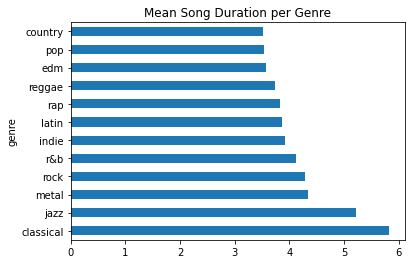

In [16]:
df.groupby('genre').duration_min.mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Mean Song Duration per Genre')
plt.show()

#### Tempo<a id='TempoAverages'></a>

The genres with the highest tempos on average are EDM, Metal, and Country, in that order.

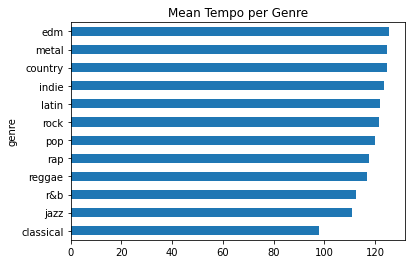

In [17]:
df.groupby('genre').tempo.mean().sort_values().plot(kind='barh')
plt.title('Mean Tempo per Genre')
plt.show()

#### Mode<a id='ModeAverages'></a>

The amount of songs with major and minor modes for each genre are displayed below. The only genre with more minor songs than major songs is R&B.

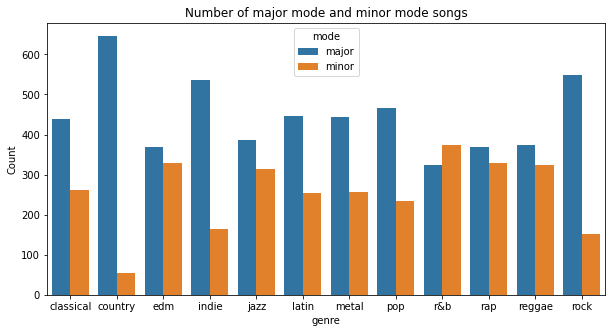

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='genre', y='track_id', hue='mode', data=df.groupby(['genre', 'mode']).track_id.count().reset_index())
plt.title('Number of major mode and minor mode songs')
plt.ylabel('Count')
plt.show()

#### Audio Features<a id='FeatureAverages'></a>

The average values for each genres' audio features are displayed below.

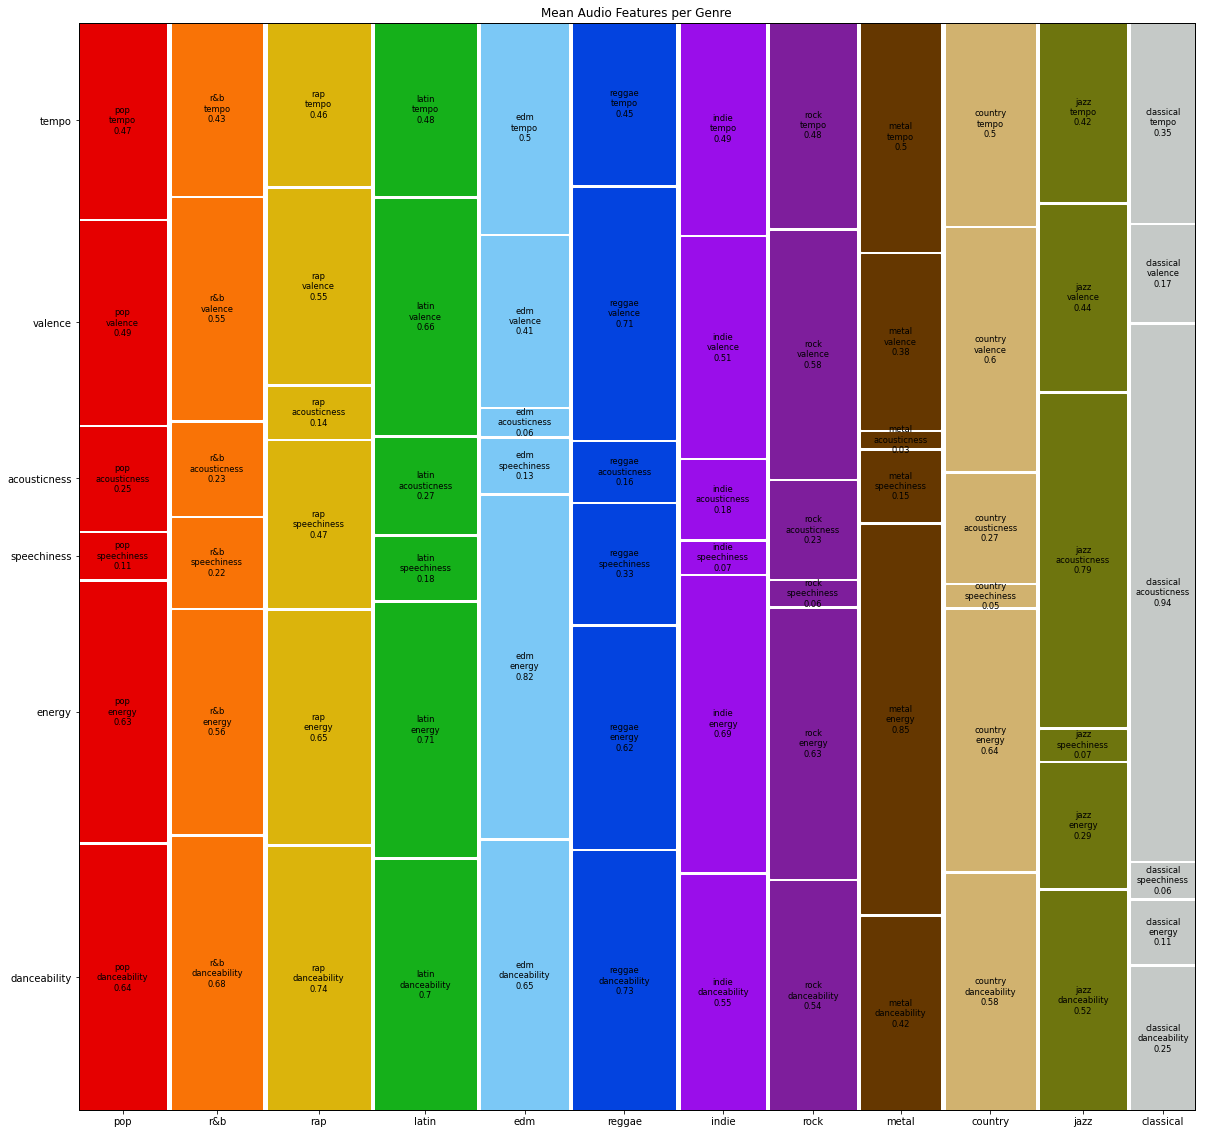

In [19]:
af = df.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'valence', 'tempo', 'genre']]
af['tempo'] = af[['tempo']].apply(lambda x: (x-min(x))/(max(x)-min(x))) # normalize tempo
af_means = af.groupby('genre').mean().reindex(index=genre_colors.index)
tuples = list(product(af_means.index.values, af_means.columns.values))
index = pd.MultiIndex.from_tuples(tuples, names=['genres', 'audio features'])
data = pd.Series([val for row in af_means.values for val in row], index=index)
#labelizer = val.index+' '+val._name+' '+str(val) for row in      ####    lambda k: "\n".join(k)
props = dict(zip(tuples, [{'color':'xkcd:'+genre_colors[tup[0]]} for tup in tuples]))
mosaic(data, title='Mean Audio Features per Genre', properties=props,
       labelizer=lambda k: "\n".join(k) + '\n' + str(round(af_means[k[1]][k[0]], 2)))[0]
plt.gcf().set_size_inches(20,20)
plt.show()

### Distributions of Dataset Features by Genre<a id='DistributionsByGenre'></a>

Helper functions for visualizing data distributions:

In [20]:
def radar_chart(values, labels, color='red'):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color=color, linewidth=1)
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles)[:-1], labels)
    for label, angle in zip(ax.get_xticklabels(), angles):
      if angle in (0, np.pi):
        label.set_horizontalalignment('center')
      elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
      else:
        label.set_horizontalalignment('right')
    ax.set_ylim(0, 1)
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_rlabel_position(180 / len(labels))
    ax.tick_params(colors='#222222')
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(color='#AAAAAA')
    ax.spines['polar'].set_color('#222222')
    ax.set_facecolor('#FAFAFA')

def visualize_genre(data, color='white'):
    # Histograms of the distributions of release years, song durations, tempos, and loudness
    fig1, axes1 = plt.subplots(1,5, figsize=(10, 4))
    plt.tight_layout()
    fig.suptitle(data.genre.unique()[0].capitalize())
    sns.histplot(x=data.release_year, ax=axes1[0], color=color)
    sns.histplot(x=data.duration_min, ax=axes1[1], color=color)
    sns.histplot(x=data.tempo, ax=axes1[2], color=color)
    sns.histplot(x=data.loudness, ax=axes1[3], color=color)
    data['mode'].value_counts().plot(kind='bar', ax=axes1[4], color=color)
    # Violin plots of the distributions of audio features
    features = ['danceability', 'energy', 'speechiness', 'acousticness', 'valence', 'tempo', 'genre']
    plt.subplots_adjust(top=0.85)
    fig2, axes2 = plt.subplots(1,6, figsize=(10, 4))
    plt.tight_layout()
    for i, column in enumerate(features[:-1]):
        sns.violinplot(x=data[column], ax=axes2[i], color=color)
        if(column!='tempo'):
            axes2[i].set_xlim(0, 1)
    # Radar charts of the means of audio features
    af = data.loc[:,features]
    af['tempo_norm'] = af[['tempo']].apply(lambda x: (x-min(x))/(max(x)-min(x)))
    af.drop('tempo', axis=1, inplace=True)
    af_means = af.groupby('genre').mean()
    radar_chart(af_means.values[0].tolist(), features[:-1], color=color)

**<span style="color:red">Pop</span>**<a id='Pop'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   211787.162857   61.288571      0.641990    0.627908   -6.423193   
std     36112.963673   15.458640      0.134859    0.194702    2.464210   
min    123348.000000    0.000000      0.233000    0.059600  -18.515000   
25%    188066.000000   52.000000      0.570750    0.499750   -7.623750   
50%    206762.000000   64.000000      0.659000    0.663000   -6.088000   
75%    229593.500000   73.000000      0.734500    0.783000   -4.738250   
max    394146.000000   96.000000      0.944000    0.994000   -1.100000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.109279      0.248285          0.027911    0.152561    0.490104   
std       0.129051      0.281981          0.123617    0.105618    0.226609   
min       0.004502      0.000065          0.000000    0.023400    0.035900   
25%       0.032309      0.031750          0.000000    0.092650    0.308750   
50%       0.059587      0.118000          0.000000    0.114000    0.462500   
75%       0.133475      0.373000          0.000191    0.177000    0.660500   
max       0.931144      0.976000          0.927000    0.764000    0.965000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   119.849724   2013.651429      3.529786  
std     25.939177      5.778326      0.601883  
min     55.605000   1993.000000      2.055800  
25%    102.986250   2010.000000      3.134433  
50%    119.973500   2015.000000      3.446033  
75%    130.042250   2019.000000      3.826558  
max    209.809000   2020.000000      6.569100

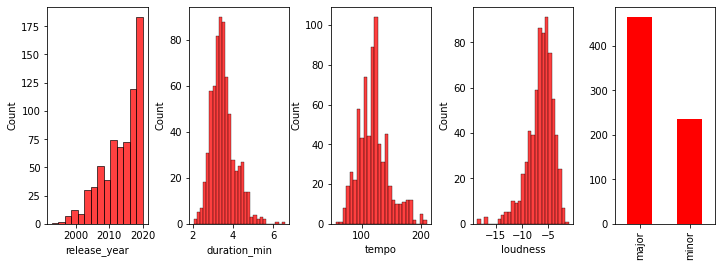

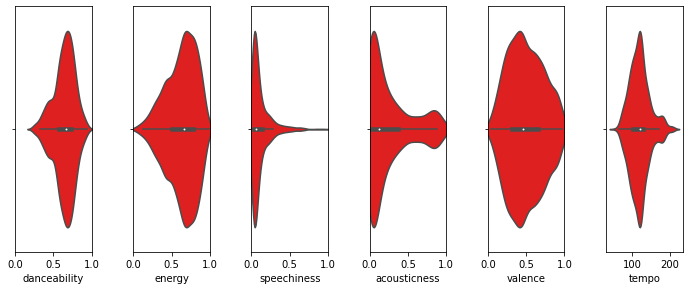

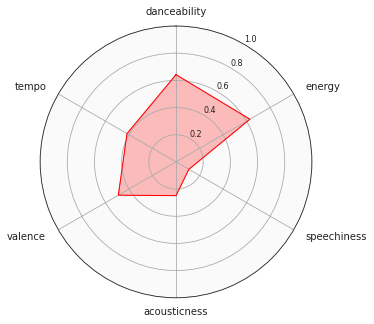

In [21]:
pop = df[df['genre']=='pop']
visualize_genre(pop, color=genre_colors['pop'])
pop.describe()

**<span style="color:orange">R&B</span>**<a id='R&B'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   247805.077143   53.957143      0.684081    0.559094   -7.839703   
std     49232.601828   13.123531      0.129248    0.148942    2.769737   
min    140256.000000    0.000000      0.257000    0.170000  -17.844000   
25%    215809.500000   47.000000      0.613500    0.457750   -9.717000   
50%    243733.000000   56.000000      0.699000    0.551500   -7.430000   
75%    275640.000000   62.250000      0.769000    0.663250   -5.862000   
max    521693.000000   84.000000      0.963000    0.988000   -0.478000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.221846      0.229734          0.010085    0.157284    0.554040   
std       0.236156      0.219182          0.062525    0.122449    0.224875   
min       0.000000      0.000204          0.000000    0.027200    0.039700   
25%       0.054687      0.050975          0.000000    0.081225    0.363750   
50%       0.113083      0.158500          0.000001    0.111000    0.568000   
75%       0.330641      0.360000          0.000077    0.191000    0.751250   
max       1.000000      0.923000          0.786000    0.943000    0.969000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   112.464817   2005.662857      4.130085  
std     28.521136     10.364766      0.820543  
min     54.585000   1971.000000      2.337600  
25%     91.014750   1997.000000      3.596825  
50%    106.991000   2004.000000      4.062217  
75%    129.772250   2017.000000      4.594000  
max    203.862000   2020.000000      8.694883

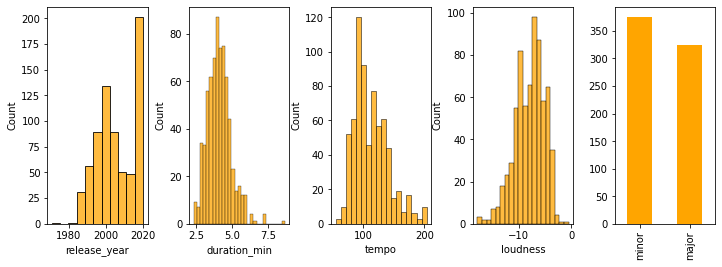

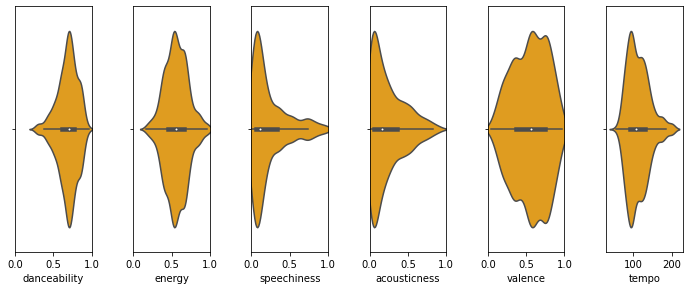

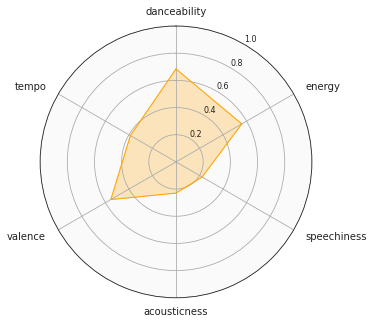

In [22]:
rnb = df[df['genre']=='r&b']
visualize_genre(rnb, color=genre_colors['r&b'])
rnb.describe()

**<span style="color:gold">Hip Hop</span>**<a id='Rap'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   229668.562857   61.531429      0.741653    0.654607   -6.811279   
std     49953.501647   12.598812      0.129927    0.137468    2.466788   
min    120133.000000    6.000000      0.212000    0.290000  -18.943000   
25%    193649.500000   54.000000      0.675000    0.547000   -8.127250   
50%    229525.000000   62.000000      0.761000    0.650000   -6.431000   
75%    263593.000000   70.000000      0.840000    0.759000   -5.161250   
max    449480.000000   93.000000      0.970000    0.974000   -1.385000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.468694      0.142755          0.009507    0.199978    0.548417   
std       0.280472      0.166002          0.071779    0.162085    0.213936   
min       0.014301      0.000204          0.000000    0.034800    0.038400   
25%       0.224047      0.025650          0.000000    0.096650    0.392000   
50%       0.465042      0.082400          0.000000    0.130000    0.556500   
75%       0.698755      0.196250          0.000009    0.267000    0.719250   
max       0.997352      0.905000          0.859000    0.918000    0.972000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   117.465080   2009.195714      3.827809  
std     31.364341      9.418743      0.832558  
min     56.046000   1986.000000      2.002217  
25%     92.110250   2002.750000      3.227492  
50%    102.536500   2010.000000      3.825417  
75%    143.958000   2018.000000      4.393217  
max    192.099000   2020.000000      7.491333

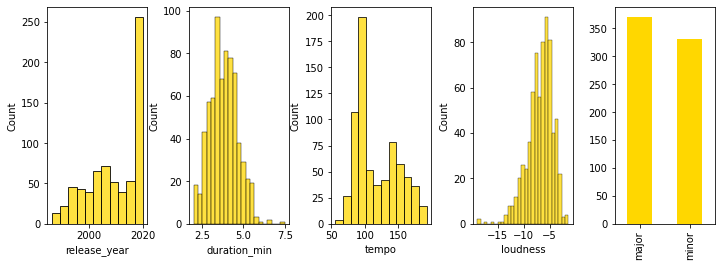

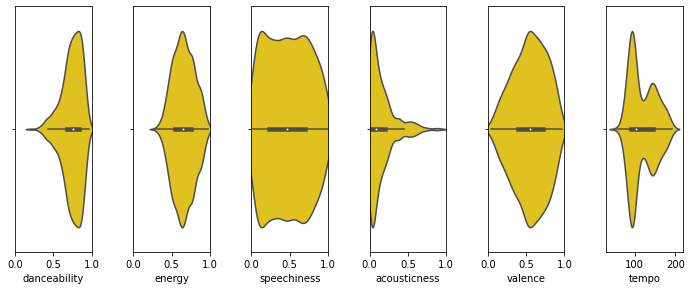

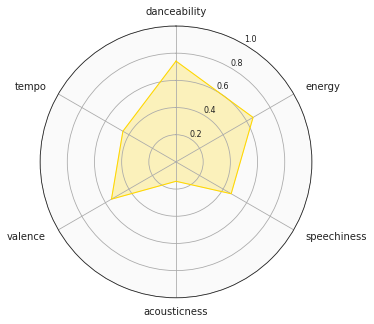

In [23]:
hiphop = df[df['genre']=='rap']
visualize_genre(hiphop, color=genre_colors['rap'])
hiphop.describe()

**<span style="color:green">Latin</span>**<a id='Latin'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   231850.917143   58.921429      0.698657    0.707266   -6.128681   
std     51482.793397   16.096485      0.118640    0.166690    2.576302   
min    129333.000000    0.000000      0.285000    0.128000  -15.084000   
25%    197800.000000   52.000000      0.625000    0.630000   -7.144750   
50%    226093.000000   63.000000      0.725500    0.740000   -5.826500   
75%    254343.250000   70.000000      0.785000    0.831000   -4.383500   
max    579255.000000   91.000000      0.932000    0.997000   -1.459000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.175086      0.266849          0.004567    0.184946    0.656832   
std       0.203974      0.233360          0.026840    0.148519    0.210128   
min       0.005297      0.000157          0.000000    0.024600    0.068000   
25%       0.039791      0.077500          0.000000    0.093300    0.511500   
50%       0.085275      0.191000          0.000000    0.127500    0.694000   
75%       0.220736      0.405500          0.000035    0.240500    0.837000   
max       0.976165      0.941000          0.331000    0.932000    0.975000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   121.712793   2010.360000      3.864182  
std     33.360472      8.528106      0.858047  
min     67.531000   1981.000000      2.155550  
25%     94.015000   2005.000000      3.296667  
50%    112.008000   2011.000000      3.768217  
75%    146.223250   2019.000000      4.239054  
max    214.025000   2020.000000      9.654250

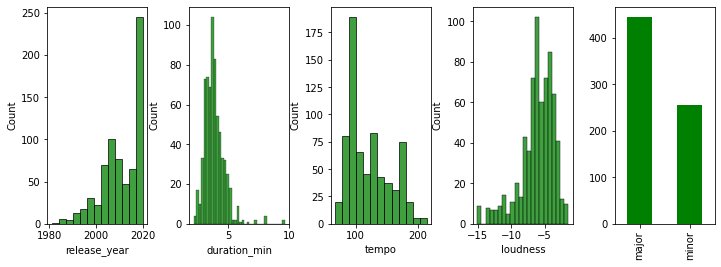

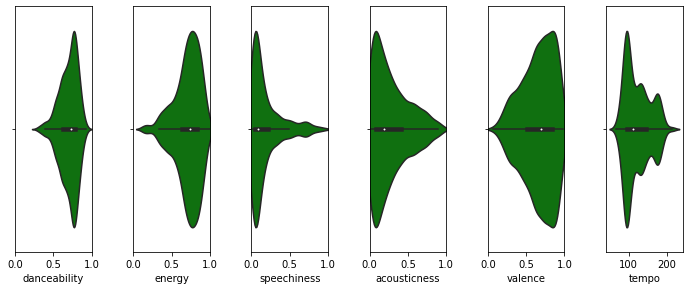

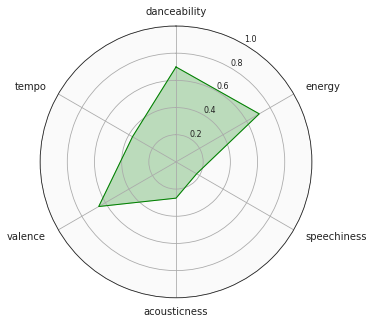

In [24]:
latin = df[df['genre']=='latin']
visualize_genre(latin, color=genre_colors['latin'])
latin.describe()

**<span style="color:lightblue">EDM</span>**<a id='EDM'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   214300.357143   50.401429      0.645756    0.819560   -5.340514   
std     66389.760274   14.963006      0.117566    0.120427    2.040396   
min    129819.000000    0.000000      0.128000    0.348000  -14.037000   
25%    171699.500000   43.000000      0.569000    0.739750   -6.324250   
50%    196792.000000   53.000000      0.642000    0.842000   -5.049000   
75%    226019.750000   60.000000      0.725500    0.915000   -3.968500   
max    531000.000000   83.000000      0.919000    0.998000   -0.873000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.127674      0.062840          0.224340    0.221422    0.405730   
std       0.147365      0.107499          0.339095    0.178781    0.230294   
min       0.009799      0.000010          0.000000    0.014100    0.032900   
25%       0.047074      0.003380          0.000006    0.097425    0.214000   
50%       0.077860      0.020400          0.002050    0.154000    0.370500   
75%       0.134534      0.066500          0.503000    0.312500    0.590000   
max       0.976165      0.642000          0.958000    0.899000    0.961000   

           tempo  release_year  duration_min  
count  700.00000    700.000000    700.000000  
mean   125.59283   2017.662857      3.571673  
std     11.00782      3.503612      1.106496  
min     74.98000   1970.000000      2.163650  
25%    123.87900   2017.000000      2.861658  
50%    125.99900   2019.000000      3.279867  
75%    128.01375   2020.000000      3.766996  
max    184.57300   2020.000000      8.850000

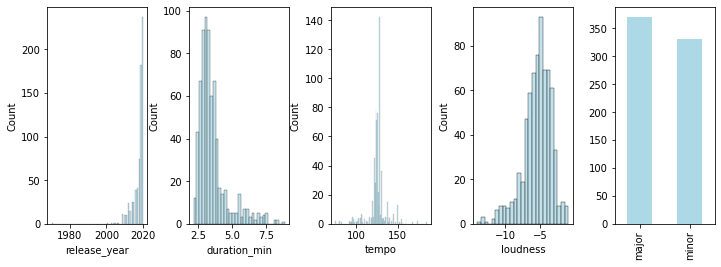

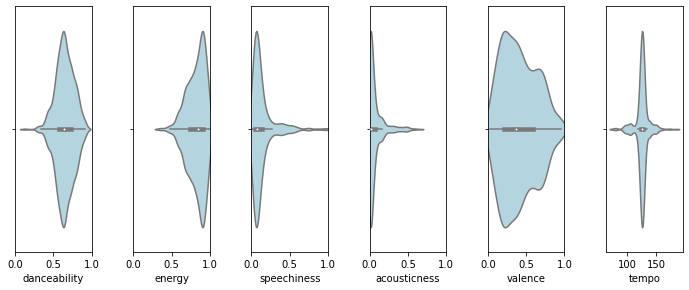

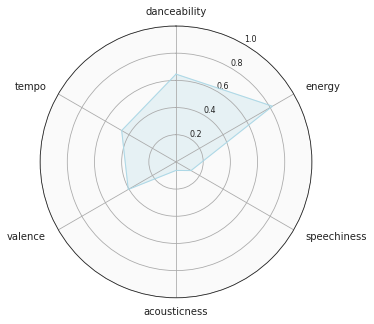

In [25]:
edm = df[df['genre']=='edm']
visualize_genre(edm, color=genre_colors['edm'])
edm.describe()

**<span style="color:blue">Reggae</span>**<a id='Reggae'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   224139.771429   42.164286      0.727889    0.622906   -7.884984   
std     54724.095182   13.369413      0.120869    0.170382    3.333180   
min    121666.000000    0.000000      0.303000    0.150000  -19.636000   
25%    188513.000000   34.000000      0.653000    0.495250   -9.893000   
50%    217859.500000   43.000000      0.740000    0.629500   -7.233000   
75%    246119.750000   51.000000      0.818250    0.746250   -5.464000   
max    490181.000000   78.000000      0.976000    0.995000   -1.119000   

       speechiness  acousticness  instrumentalness    liveness    valence  \
count   700.000000    700.000000        700.000000  700.000000  700.00000   
mean      0.334594      0.164052          0.071368    0.169584    0.70812   
std       0.266604      0.180777          0.209657    0.143752    0.17583   
min       0.011917      0.000013          0.000000    0.018700    0.11500   
25%       0.110964      0.029450          0.000000    0.080050    0.58200   
50%       0.253178      0.102000          0.000008    0.114500    0.73100   
75%       0.507415      0.241000          0.004180    0.206000    0.83625   
max       0.994703      0.899000          0.955000    0.952000    0.99100   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   116.647197   2003.555714      3.735663  
std     32.298459     13.570503      0.912068  
min     62.931000   1967.000000      2.027767  
25%     88.055250   1997.000000      3.141883  
50%    112.852000   2007.000000      3.630992  
75%    142.496000   2014.000000      4.101996  
max    202.879000   2020.000000      8.169683

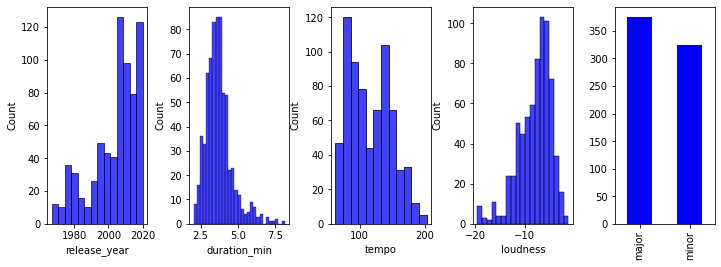

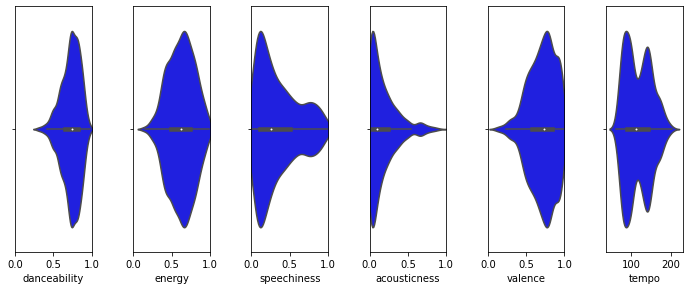

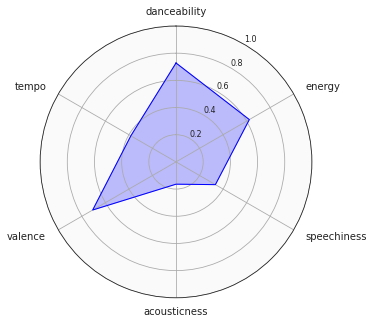

In [26]:
reggae = df[df['genre']=='reggae']
visualize_genre(reggae, color=genre_colors['reggae'])
reggae.describe()

**<span style="color:violet">Indie</span>**<a id='Indie'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   235237.855714   52.737143      0.548763    0.687864   -7.142966   
std     63262.197668   14.891675      0.144871    0.197005    3.026735   
min    125933.000000    0.000000      0.107000    0.114000  -20.178000   
25%    194447.000000   44.000000      0.465750    0.559500   -8.597000   
50%    223021.500000   55.000000      0.562000    0.722000   -6.328500   
75%    259600.000000   64.000000      0.643000    0.837000   -4.920000   
max    578040.000000   86.000000      0.904000    0.992000   -2.255000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.072324      0.181581          0.128906    0.181084    0.511194   
std       0.087004      0.262296          0.250308    0.140650    0.226490   
min       0.003443      0.000003          0.000000    0.026800    0.037400   
25%       0.024364      0.005930          0.000008    0.093700    0.333000   
50%       0.046743      0.050200          0.001455    0.123000    0.510500   
75%       0.081038      0.256000          0.108000    0.227750    0.685000   
max       0.891419      0.988000          0.948000    0.932000    0.973000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   123.520409   2008.385714      3.920631  
std     27.730792      9.774705      1.054370  
min     62.984000   1969.000000      2.098883  
25%    102.756000   2002.000000      3.240783  
50%    120.875000   2010.000000      3.717025  
75%    139.773000   2017.000000      4.326667  
max    209.905000   2020.000000      9.634000

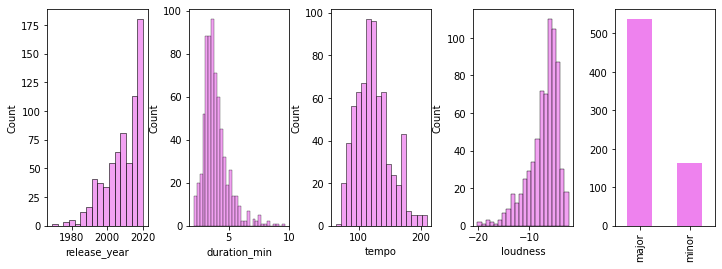

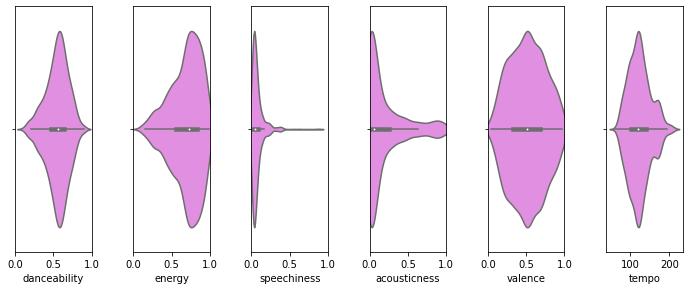

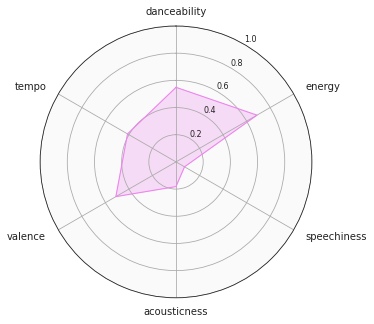

In [27]:
indie = df[df['genre']=='indie']
visualize_genre(indie, color=genre_colors['indie'])
indie.describe()

**<span style="color:Purple">Rock</span>**<a id='Rock'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   257227.368571   66.411429      0.538701    0.633312   -9.285097   
std     65400.347110    9.952499      0.135593    0.202155    3.528513   
min    121160.000000   24.000000      0.195000    0.042700  -24.709000   
25%    217613.000000   61.000000      0.459000    0.480000  -11.838750   
50%    248239.500000   68.000000      0.544000    0.662000   -8.935000   
75%    281226.000000   74.000000      0.629250    0.799000   -6.549000   
max    591693.000000   83.000000      0.855000    0.994000   -2.255000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.055838      0.227267          0.031262    0.173277    0.582358   
std       0.064978      0.248115          0.116507    0.136123    0.232395   
min       0.001854      0.000005          0.000000    0.026800    0.068100   
25%       0.021451      0.017475          0.000002    0.087700    0.384500   
50%       0.035620      0.146000          0.000080    0.116000    0.591000   
75%       0.061706      0.368250          0.004128    0.207250    0.777000   
max       0.557733      0.978000          0.889000    0.851000    0.975000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   121.500019   1984.760000      4.287123  
std     27.750734     13.196202      1.090006  
min     63.050000   1900.000000      2.019333  
25%     99.310000   1975.000000      3.626883  
50%    119.012000   1982.000000      4.137325  
75%    139.070250   1994.000000      4.687100  
max    208.571000   2020.000000      9.861550

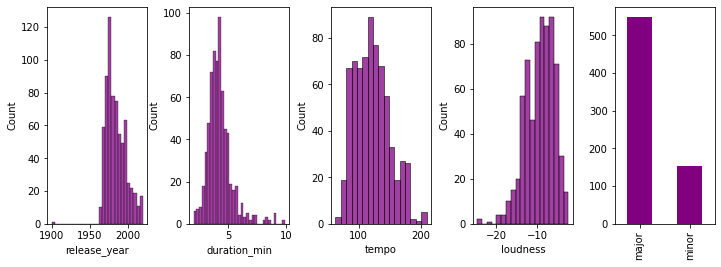

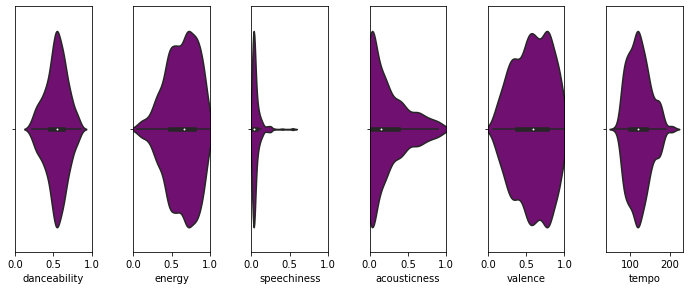

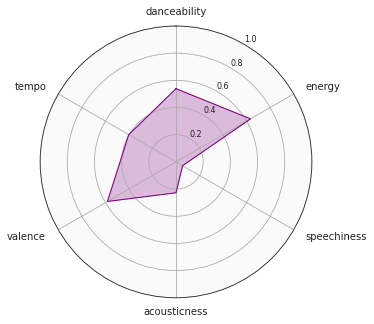

In [28]:
rock = df[df['genre']=='rock']
visualize_genre(rock, color=genre_colors['rock'])
rock.describe()

**<span style="color:brown">Metal</span>**<a id='Metal'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   260593.884286   49.187143      0.422750    0.851329   -6.775694   
std     62137.595665   16.138726      0.135971    0.160877    3.074611   
min    124160.000000    0.000000      0.075000    0.127000  -16.239000   
25%    217976.500000   37.000000      0.321000    0.798500   -8.765500   
50%    254579.500000   49.000000      0.438000    0.909000   -5.911000   
75%    290960.000000   62.000000      0.532000    0.964000   -4.459500   
max    554709.000000   80.000000      0.785000    0.998000   -1.457000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.154740      0.032322          0.156416    0.207786    0.381878   
std       0.141057      0.097722          0.283444    0.152469    0.207995   
min       0.005561      0.000001          0.000000    0.022200    0.029900   
25%       0.052966      0.000052          0.000018    0.092625    0.224000   
50%       0.109507      0.000800          0.001955    0.155000    0.369000   
75%       0.208157      0.009867          0.140500    0.291000    0.517000   
max       0.814619      0.796000          0.944000    0.965000    0.938000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   124.782970   1998.518571      4.343231  
std     29.442967     12.332005      1.035627  
min     61.207000   1968.000000      2.069333  
25%    101.267750   1989.000000      3.632942  
50%    119.867500   2000.000000      4.242992  
75%    143.973000   2007.000000      4.849333  
max    203.396000   2020.000000      9.245150

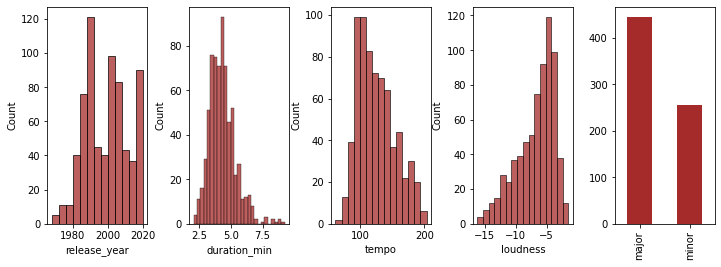

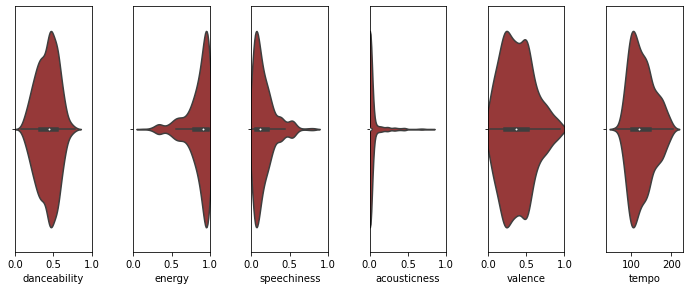

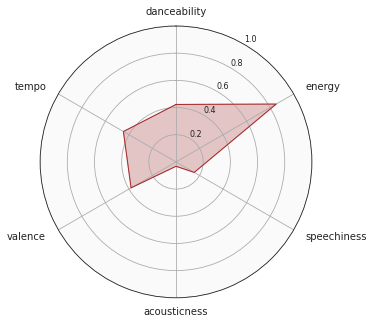

In [29]:
metal = df[df['genre']=='metal']
visualize_genre(metal, color=genre_colors['metal'])
metal.describe()

**<span style="color:tan">Country</span>**<a id='Country'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   211229.111429   55.278571      0.583339    0.643080   -7.600379   
std     48766.681434   14.924928      0.103987    0.186087    3.597861   
min    123466.000000    0.000000      0.240000    0.006810  -27.119000   
25%    184913.250000   47.000000      0.511750    0.511750   -9.464750   
50%    204666.000000   58.000000      0.591500    0.686000   -6.442000   
75%    228613.250000   67.000000      0.657000    0.796250   -5.101500   
max    591693.000000   87.000000      0.879000    0.959000   -2.276000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.052296      0.266292          0.008682    0.173846    0.598380   
std       0.075541      0.247435          0.067376    0.123499    0.215318   
min       0.002119      0.000042          0.000000    0.030100    0.055600   
25%       0.019068      0.054750          0.000000    0.097775    0.414000   
50%       0.032574      0.177000          0.000000    0.127500    0.624500   
75%       0.056409      0.415250          0.000011    0.216000    0.768250   
max       0.994703      0.973000          0.910000    0.960000    0.982000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   124.727997   2003.850000      3.520485  
std     31.086104     16.616746      0.812778  
min     69.687000   1955.000000      2.057767  
25%     98.848000   1993.750000      3.081887  
50%    121.043000   2011.000000      3.411100  
75%    146.088000   2018.000000      3.810221  
max    205.972000   2020.000000      9.861550

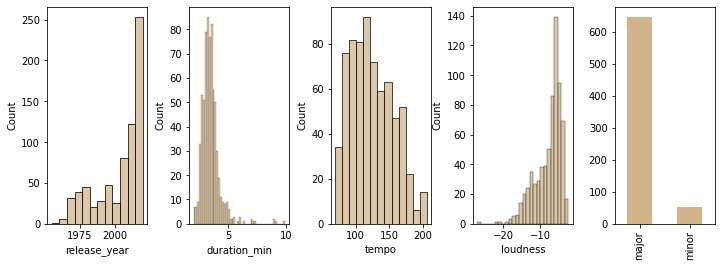

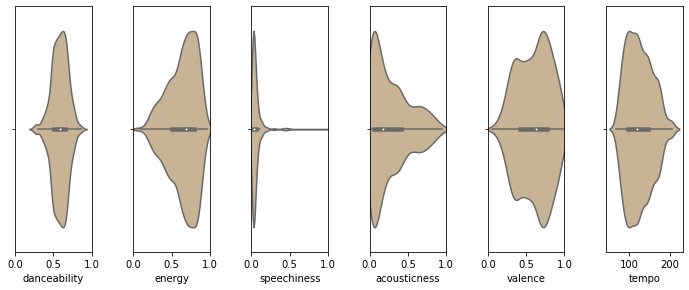

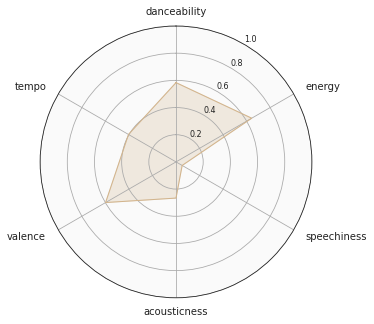

In [30]:
country = df[df['genre']=='country']
visualize_genre(country, color=genre_colors['country'])
country.describe()

**<span style="color:olive">Jazz</span>**<a id='Jazz'></a>

duration_ms  popularity  danceability      energy    loudness  \
count     700.000000  700.000000    700.000000  700.000000  700.000000   
mean   312692.642857   34.198571      0.518189    0.292942  -14.525106   
std    115222.156580   16.772713      0.118805    0.191088    4.933318   
min    130078.000000    0.000000      0.179000    0.005900  -33.106000   
25%    207866.250000   22.000000      0.436750    0.131000  -18.071000   
50%    296699.500000   37.000000      0.531000    0.279000  -13.617500   
75%    398026.000000   47.250000      0.605750    0.401250  -10.780000   
max    597280.000000   66.000000      0.851000    0.866000   -3.599000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.071780      0.786584          0.412884    0.176535    0.438800   
std       0.070942      0.202776          0.369006    0.163528    0.244147   
min       0.007680      0.008970          0.000000    0.027900    0.037300   
25%       0.034428      0.690000          0.006755    0.094325    0.221000   
50%       0.050847      0.843000          0.364000    0.116000    0.429000   
75%       0.080575      0.945250          0.822250    0.169000    0.615000   
max       0.756356      0.996000          0.970000    0.985000    0.962000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean   110.928611   1986.092857      5.211544  
std     29.449412     23.317335      1.920369  
min     46.950000   1899.000000      2.167967  
25%     89.243750   1962.000000      3.464437  
50%    109.837000   1993.000000      4.944992  
75%    128.032000   2006.000000      6.633767  
max    205.121000   2020.000000      9.954667

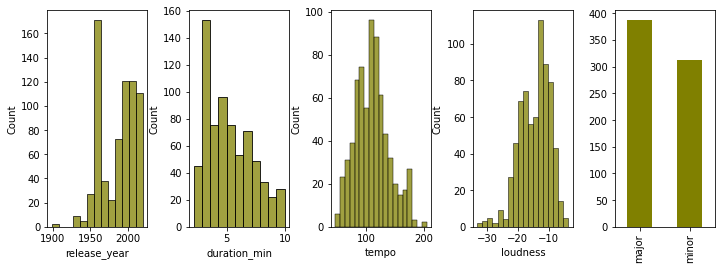

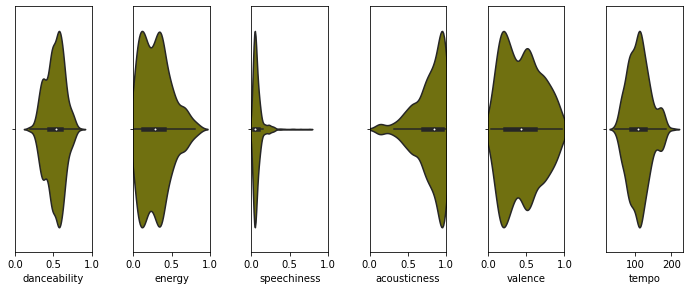

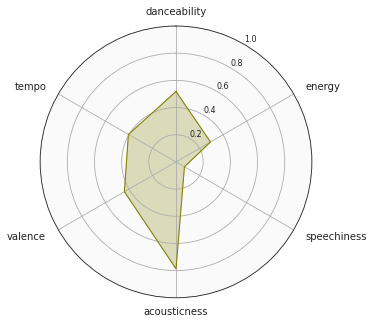

In [31]:
jazz = df[df['genre']=='jazz']
visualize_genre(jazz, color=genre_colors['jazz'])
jazz.describe()

**<span style="color:silver">Classical</span>**<a id='Classical'></a>

duration_ms  popularity  danceability      energy    loudness  \
count  7.000000e+02  700.000000    700.000000  700.000000  700.000000   
mean   3.498583e+05   22.852857      0.251285    0.109142  -22.936823   
std    1.730768e+05   17.470099      0.127561    0.089565    5.693502   
min    1.801730e+05    0.000000      0.063000    0.000634  -43.244000   
25%    2.193330e+05    9.000000      0.153000    0.042150  -25.872500   
50%    2.920395e+05   20.000000      0.225500    0.089800  -22.307500   
75%    4.179995e+05   33.000000      0.335000    0.153000  -19.000500   
max    1.148946e+06   67.000000      0.612000    0.562000   -9.591000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   700.000000    700.000000        700.000000  700.000000  700.000000   
mean      0.059829      0.938629          0.508428    0.124943    0.168418   
std       0.026918      0.084003          0.385990    0.080141    0.177141   
min       0.015625      0.405000          0.000000    0.021000    0.023800   
25%       0.045286      0.927000          0.040850    0.085700    0.039600   
50%       0.055879      0.970000          0.637000    0.104000    0.085400   
75%       0.067267      0.988000          0.889000    0.130000    0.236250   
max       0.287606      0.996000          0.982000    0.845000    0.832000   

            tempo  release_year  duration_min  
count  700.000000    700.000000    700.000000  
mean    97.899731   2004.724286      5.830972  
std     26.976438     13.467376      2.884613  
min     35.509000   1945.000000      3.002883  
25%     76.532250   1998.000000      3.655550  
50%     90.746500   2008.000000      4.867325  
75%    115.476750   2015.000000      6.966658  
max    202.847000   2020.000000     19.149100

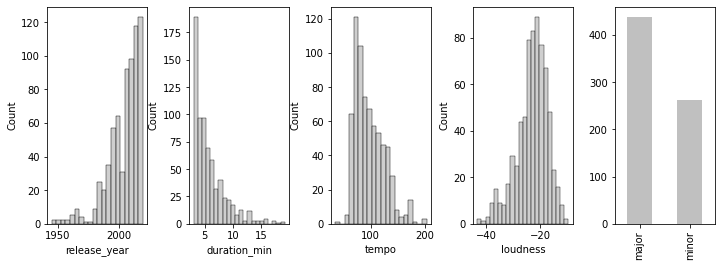

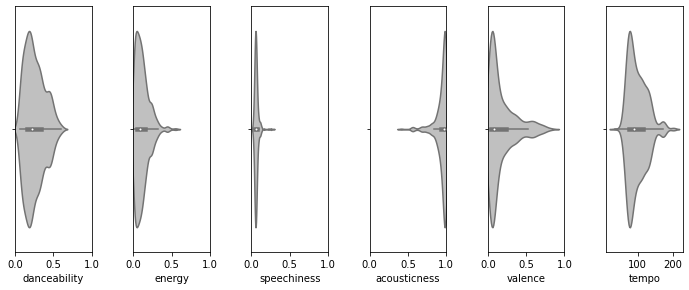

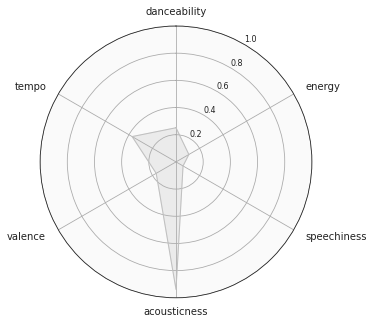

In [32]:
classical = df[df['genre']=='classical']
visualize_genre(classical, color=genre_colors['classical'])
classical.describe()

## Hypothesis Testing<a id='HypothesisTesting'></a>

A few questions arise after this initial glance. Generally, we want to know whether the features of the dataset adequately represent each genre and are able to illuminate the differences between them, particularly genres that share similarities:

* Which genre of music is the happiest? (Highest [valence](#ValenceANOVA) on average)
* Which genre of music contains the most lyrical content? (Highest [speechiness](#SpeechinessANOVA) on average)
* Which genre of music contains the most acoustic instrumentation? (Highest [acousticness](#AcousticnessANOVA) on average)
* Which genres of music are the most danceable/energetic? (Highest [danceability and energy](#DanceabilityEnergyANOVA) on average)
* Are the audio features of [Rock and Country](#RockCountry) significantly different from eachother?
* Are the audio features of [Rock and Metal](#RockMetal) significantly different from eachother?
* Are the audio features of [Rap and R&B](#RapR&B) signficantly different from eachother?
* Are the audio features of Pop songs significantly different from those of songs in other popular major genres, such as [Rock](#PopRock), [Rap](#PopRap), [Latin](#PopLatin), [Indie](#PopIndie)
    * [Country](#PopCountry)

### One-Factor ANOVA of Genre Valence<a id='ValenceANOVA'></a>

In [33]:
genre_valence = pd.DataFrame([df[df['genre']==genre]['valence'].values for genre in genre_colors.index.values],
                                 index=genre_colors.index.values).T
print(stats.f_oneway(genre_valence.iloc[:,0], genre_valence.iloc[:,1], genre_valence.iloc[:,2],
               genre_valence.iloc[:,3], genre_valence.iloc[:,4], genre_valence.iloc[:,5],
               genre_valence.iloc[:,6], genre_valence.iloc[:,7], genre_valence.iloc[:,8],
               genre_valence.iloc[:,9], genre_valence.iloc[:,10], genre_valence.iloc[:,11]))
stacked_valence = genre_valence.stack().reset_index().rename(columns={'level_0': 'id', 'level_1': 'treatment', 0:'result'})
print(pairwise_tukeyhsd(endog=stacked_valence['result'], groups=stacked_valence['treatment']))

F_onewayResult(statistic=307.55360987699436, pvalue=0.0)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------------
classical country     0.43  0.001  0.3922  0.4678   True
classical     edm   0.2373  0.001  0.1995  0.2751   True
classical   indie   0.3428  0.001   0.305  0.3806   True
classical    jazz   0.2704  0.001  0.2326  0.3082   True
classical   latin   0.4884  0.001  0.4506  0.5262   True
classical   metal   0.2135  0.001  0.1757  0.2513   True
classical     pop   0.3217  0.001  0.2839  0.3595   True
classical     r&b   0.3856  0.001  0.3478  0.4234   True
classical     rap     0.38  0.001  0.3422  0.4178   True
classical  reggae   0.5397  0.001  0.5019  0.5775   True
classical    rock   0.4139  0.001  0.3761  0.4517   True
  country     edm  -0.1927  0.001 -0.2305 -0.1548   True
  country   indie  -0.0872  0.001  -0.125 -0.0494   True
  country    jazz  -0.1596  0.0

### One-Factor ANOVA of Genre Speechiness<a id='SpeechinessANOVA'></a>

In [34]:
genre_speechiness = pd.DataFrame([df[df['genre']==genre]['speechiness'].values for genre in genre_colors.index.values],
                                 index=genre_colors.index.values).T
print(stats.f_oneway(genre_speechiness.iloc[:,0], genre_speechiness.iloc[:,1], genre_speechiness.iloc[:,2],
               genre_speechiness.iloc[:,3], genre_speechiness.iloc[:,4], genre_speechiness.iloc[:,5],
               genre_speechiness.iloc[:,6], genre_speechiness.iloc[:,7], genre_speechiness.iloc[:,8],
               genre_speechiness.iloc[:,9], genre_speechiness.iloc[:,10], genre_speechiness.iloc[:,11]))
stacked_speechiness = genre_speechiness.stack().reset_index().rename(columns={'level_0': 'id', 'level_1': 'treatment', 0:'result'})
print(pairwise_tukeyhsd(endog=stacked_speechiness['result'], groups=stacked_speechiness['treatment']))

F_onewayResult(statistic=421.51845645008524, pvalue=0.0)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------------
classical country  -0.0075    0.9 -0.0365  0.0214  False
classical     edm   0.0678  0.001  0.0389  0.0968   True
classical   indie   0.0125    0.9 -0.0164  0.0414  False
classical    jazz    0.012    0.9  -0.017  0.0409  False
classical   latin   0.1153  0.001  0.0863  0.1442   True
classical   metal   0.0949  0.001   0.066  0.1238   True
classical     pop   0.0494  0.001  0.0205  0.0784   True
classical     r&b    0.162  0.001  0.1331  0.1909   True
classical     rap   0.4089  0.001  0.3799  0.4378   True
classical  reggae   0.2748  0.001  0.2458  0.3037   True
classical    rock   -0.004    0.9 -0.0329  0.0249  False
  country     edm   0.0754  0.001  0.0465  0.1043   True
  country   indie     0.02 0.5023 -0.0089  0.0489  False
  country    jazz   0.0195 0.54

### One-Factor ANOVA of Genre Acousticness<a id='AcousticnessANOVA'></a>

In [35]:
genre_acousticness = pd.DataFrame([df[df['genre']==genre]['acousticness'].values for genre in genre_colors.index.values],
                                 index=genre_colors.index.values).T
print(stats.f_oneway(genre_acousticness.iloc[:,0], genre_acousticness.iloc[:,1], genre_acousticness.iloc[:,2],
               genre_acousticness.iloc[:,3], genre_acousticness.iloc[:,4], genre_acousticness.iloc[:,5],
               genre_acousticness.iloc[:,6], genre_acousticness.iloc[:,7], genre_acousticness.iloc[:,8],
               genre_acousticness.iloc[:,9], genre_acousticness.iloc[:,10], genre_acousticness.iloc[:,11]))
stacked_acousticness = genre_acousticness.stack().reset_index().rename(columns={'level_0': 'id', 'level_1': 'treatment', 0:'result'})
print(pairwise_tukeyhsd(endog=stacked_acousticness['result'], groups=stacked_acousticness['treatment']))

F_onewayResult(statistic=1282.018730855393, pvalue=0.0)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------------
classical country  -0.6723  0.001 -0.7081 -0.6366   True
classical     edm  -0.8758  0.001 -0.9116   -0.84   True
classical   indie   -0.757  0.001 -0.7928 -0.7213   True
classical    jazz   -0.152  0.001 -0.1878 -0.1163   True
classical   latin  -0.6718  0.001 -0.7076  -0.636   True
classical   metal  -0.9063  0.001 -0.9421 -0.8705   True
classical     pop  -0.6903  0.001 -0.7261 -0.6546   True
classical     r&b  -0.7089  0.001 -0.7447 -0.6731   True
classical     rap  -0.7959  0.001 -0.8317 -0.7601   True
classical  reggae  -0.7746  0.001 -0.8104 -0.7388   True
classical    rock  -0.7114  0.001 -0.7471 -0.6756   True
  country     edm  -0.2035  0.001 -0.2392 -0.1677   True
  country   indie  -0.0847  0.001 -0.1205 -0.0489   True
  country    jazz   0.5203  0.00

### MANOVA of Genre Danceability and Energy<a id='DanceabilityEnergyANOVA'></a>

Figure(432x288)


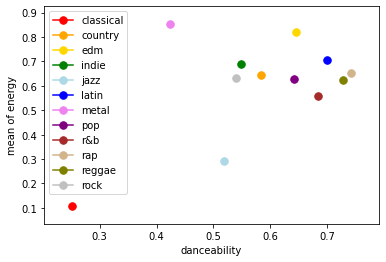

In [36]:
print(interaction_plot(af_means.danceability, af_means.index, af_means.energy, colors=genre_colors, ms=15))

In [37]:
maov = MANOVA.from_formula('danceability + energy ~ genre', data=df)
print(maov.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
         Intercept        Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.7353 2.0000 8387.0000 1509.8441 0.0000
           Pillai's trace 0.2647 2.0000 8387.0000 1509.8441 0.0000
   Hotelling-Lawley trace 0.3600 2.0000 8387.0000 1509.8441 0.0000
      Roy's greatest root 0.3600 2.0000 8387.0000 1509.8441 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
         genre          Value   Num DF   Den DF    F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.2130 22.0000 16774.0000  889.6377 0.0000
         Pillai'

### Rock vs Country<a id='RockCountry'></a>

In [38]:
t_rock_country = stats.ttest_ind(df[df['genre']=='rock'][audio_features],
                                 df[df['genre']=='country'][audio_features])
print('Results of T-Tests between the Audio Features of Rock and Country Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_rock_country.statistic,
                    'P-Value':t_rock_country.pvalue}))
print('\nResults of A MANOVA between the Audio Features of Rock and Country Music\n\n',
      MANOVA.from_formula('danceability + energy + speechiness + acousticness + valence + tempo ~ genre',
                           data=df.loc[(df['genre']=='rock') | (df['genre']=='country')]).mv_test())

Results of T-Tests between the Audio Features of Rock and Country Music

      Audio Features  Statistic       P-Value
0      danceability  -6.911360  7.273821e-12
1            energy  -0.940539  3.471036e-01
2          loudness  -8.845088  2.699648e-18
3       speechiness   0.940367  3.471920e-01
4      acousticness  -2.946555  3.266587e-03
5  instrumentalness   4.438788  9.757597e-06
6          liveness  -0.081969  9.346833e-01
7           valence  -1.338026  1.811057e-01
8             tempo  -2.049503  4.059918e-02

Results of A MANOVA between the Audio Features of Rock and Country Music

                     Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0254 6.0000 1393.0000 8906.4040 0.0000
         Pillai's trace 

### Rock vs Metal<a id='RockMetal'></a>

In [39]:
t_rock_metal = stats.ttest_ind(df[df['genre']=='rock'][audio_features],
                                 df[df['genre']=='metal'][audio_features])
print('Results of T-Tests between the Audio Features of Rock and Metal Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_rock_metal.statistic,
                    'P-Value':t_rock_metal.pvalue}))
print('\nResults of a MANOVA between the Audio Features of Rock and Metal Music\n\n',
      MANOVA.from_formula('danceability + energy + speechiness + acousticness + valence + tempo ~ genre',
                           data=df.loc[(df['genre']=='rock') | (df['genre']=='metal')]).mv_test())

Results of T-Tests between the Audio Features of Rock and Metal Music

      Audio Features  Statistic       P-Value
0      danceability  15.975990  6.718351e-53
1            energy -22.326376  1.106990e-94
2          loudness -14.186044  8.917107e-43
3       speechiness -16.848947  3.903533e-58
4      acousticness  19.341684  4.806448e-74
5  instrumentalness -10.805126  3.412278e-26
6          liveness  -4.467084  8.568235e-06
7           valence  17.007167  4.195594e-59
8             tempo  -2.146793  3.198134e-02

Results of a MANOVA between the Audio Features of Rock and Metal Music

                     Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0295 6.0000 1393.0000 7645.3369 0.0000
         Pillai's trace  0.9

### Rap vs R&B<a id='RapR&B'></a>

In [40]:
t_rap_rnb = stats.ttest_ind(df[df['genre']=='rock'][audio_features],
                                 df[df['genre']=='r&b'][audio_features])
print('Results of T-Tests between the Audio Features of Rap and R&B Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_rap_rnb.statistic,
                    'P-Value':t_rap_rnb.pvalue}))
print('\nResults of a MANOVA between the Audio Features of Rap and R&B Music\n\n',
      MANOVA.from_formula('danceability + energy + speechiness + acousticness + valence + tempo ~ genre',
                           data=df.loc[(df['genre']=='rap') | (df['genre']=='r&b')]).mv_test())

Results of T-Tests between the Audio Features of Rap and R&B Music

      Audio Features  Statistic       P-Value
0      danceability -20.533322  4.256666e-82
1            energy   7.820148  1.032279e-14
2          loudness  -8.525138  3.900400e-17
3       speechiness -17.932175  6.984453e-65
4      acousticness  -0.197175  8.437196e-01
5  instrumentalness   4.237317  2.410174e-05
6          liveness   2.310990  2.097831e-02
7           valence   2.316880  2.065420e-02
8             tempo   6.007169  2.403693e-09

Results of a MANOVA between the Audio Features of Rap and R&B Music

                     Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0234 6.0000 1393.0000 9676.2529 0.0000
         Pillai's trace  0.9766 6.

### Pop vs Rock<a id='PopRock'></a>

In [41]:
t_pop_rock = stats.ttest_ind(df[df['genre']=='pop'][audio_features],
                                 df[df['genre']=='rock'][audio_features])
print('Results of T-Tests between the Audio Features of Pop and Rock Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_pop_rock.statistic,
                    'P-Value':t_pop_rock.pvalue}))
print('\nResults of a MANOVA between the Audio Features of Pop and Rock Music\n\n',
      MANOVA.from_formula('danceability + energy + speechiness + acousticness + valence + tempo ~ genre',
                           data=df.loc[(df['genre']=='pop') | (df['genre']=='rock')]).mv_test())

Results of T-Tests between the Audio Features of Pop and Rock Music

      Audio Features  Statistic       P-Value
0      danceability  14.289718  2.441281e-43
1            energy  -0.509412  6.105440e-01
2          loudness  17.593471  9.606195e-63
3       speechiness   9.785757  6.430472e-22
4      acousticness   1.480515  1.389611e-01
5  instrumentalness  -0.521898  6.018237e-01
6          liveness  -3.181070  1.499559e-03
7           valence  -7.519727  9.769470e-14
8             tempo  -1.149438  2.505719e-01

Results of a MANOVA between the Audio Features of Pop and Rock Music

                     Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0235 6.0000 1393.0000 9627.3831 0.0000
         Pillai's trace  0.9765 

### Pop vs Latin<a id='PopLatin'></a>

In [42]:
t_pop_latin = stats.ttest_ind(df[df['genre']=='pop'][audio_features],
                                 df[df['genre']=='latin'][audio_features])
print('Results of T-Tests between the Audio Features of Pop and Latin Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_pop_latin.statistic,
                    'P-Value':t_pop_latin.pvalue}))
print('\nResults of a MANOVA between the Audio Features of Pop and Latin Music\n\n',
      MANOVA.from_formula('danceability + energy + speechiness + acousticness + valence + tempo ~ genre',
                           data=df.loc[(df['genre']=='pop') | (df['genre']=='latin')]).mv_test())

Results of T-Tests between the Audio Features of Pop and Latin Music

      Audio Features  Statistic       P-Value
0      danceability  -8.347010  1.661855e-16
1            energy  -8.191654  5.755212e-16
2          loudness  -2.185668  2.900536e-02
3       speechiness  -7.213359  8.915692e-13
4      acousticness  -1.341933  1.798355e-01
5  instrumentalness   4.882507  1.167857e-06
6          liveness  -4.701484  2.837835e-06
7           valence -14.274018  2.971724e-43
8             tempo  -1.166450  2.436316e-01

Results of a MANOVA between the Audio Features of Pop and Latin Music

                     Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0186 6.0000 1393.0000 12264.3429 0.0000
         Pillai's trace  

### Pop vs Indie<a id='PopIndie'></a>

In [43]:
t_pop_indie = stats.ttest_ind(df[df['genre']=='pop'][audio_features],
                                 df[df['genre']=='indie'][audio_features])
print('Results of T-Tests between the Audio Features of Pop and Indie Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_pop_indie.statistic,
                    'P-Value':t_pop_indie.pvalue}))
print('\nResults of a MANOVA between the Audio Features of Pop and Indie Music\n\n',
      MANOVA.from_formula('danceability + energy + speechiness + acousticness + valence + tempo ~ genre',
                           data=df.loc[(df['genre']=='pop') | (df['genre']=='indie')]).mv_test())

Results of T-Tests between the Audio Features of Pop and Indie Music

      Audio Features  Statistic       P-Value
0      danceability  12.462035  7.046560e-34
1            energy  -5.727002  1.249612e-08
2          loudness   4.879162  1.187497e-06
3       speechiness   6.281934  4.456008e-10
4      acousticness   4.582587  5.002076e-06
5  instrumentalness  -9.571597  4.578438e-21
6          liveness  -4.290325  1.906758e-05
7           valence  -1.741655  8.178876e-02
8             tempo  -2.557631  1.064352e-02

Results of a MANOVA between the Audio Features of Pop and Indie Music

                     Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0232 6.0000 1393.0000 9771.4752 0.0000
         Pillai's trace  0.976

### Pop vs Country<a id='PopCountry'></a>

In [44]:
t_pop_country = stats.ttest_ind(df[df['genre']=='pop'][audio_features],
                                 df[df['genre']=='country'][audio_features])
print('Results of T-Tests between the Audio Features of Pop and Country Music\n\n',
      pd.DataFrame({'Audio Features':audio_features, 'Statistic':t_pop_country.statistic,
                    'P-Value':t_pop_country.pvalue}))
print('\nResults of a MANOVA between the Audio Features of Pop and Country Music\n\n',
      MANOVA.from_formula('danceability + energy + speechiness + acousticness + valence + tempo ~ genre',
                           data=df.loc[(df['genre']=='pop') | (df['genre']=='country')]).mv_test())

Results of T-Tests between the Audio Features of Pop and Country Music

      Audio Features  Statistic       P-Value
0      danceability   9.112268  2.718727e-19
1            energy  -1.490390  1.363473e-01
2          loudness   7.142064  1.474037e-12
3       speechiness  10.082018  4.004472e-23
4      acousticness  -1.269930  2.043209e-01
5  instrumentalness   3.613616  3.126633e-04
6          liveness  -3.465415  5.454359e-04
7           valence  -9.164466  1.724232e-19
8             tempo  -3.187872  1.464980e-03

Results of a MANOVA between the Audio Features of Pop and Country Music

                     Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0203 6.0000 1393.0000 11204.8185 0.0000
         Pillai's tra

## Conclusion<a id='Conclusion'></a>